In [1]:
import seaborn as sns
import os
import glob
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Global plot settings
plt.rcParams.update({
    "font.size": 14,         # increase general font size
    "axes.labelsize": 20,    # axis label font size
    "axes.titlesize": 18,    # title font size
    "xtick.labelsize": 18,   # x tick labels
    "ytick.labelsize": 18,   # y tick labels
    "figure.dpi": 600,       # high-resolution figure
})

In [3]:
def load_decoding_metrics(results_dir):
    """
    Scan `results_dir` for files like:
      sub-13_ses-01_classification_report.csv
    Extract subject/session IDs and load precision, recall, f1 from each file.

    Parameters
    ----------
    results_dir : str
        Path to the folder containing your *_classification_report.csv files.

    Returns
    -------
    List[dict]
        A list of records, each with keys:
        - 'subject_id' : str
        - 'session_id' : str
        - 'precision'  : float
        - 'recall'     : float
        - 'f1'         : float
    """
    pattern = os.path.join(results_dir, "*_classification_report.csv")
    files = glob.glob(pattern)
    records = []

    # Regex to extract subject and session IDs
    # Example filename: sub-13_ses-01_classification_report.csv
    filename_re = re.compile(r"sub-(\d+)_ses-(\d+)_classification_report\.csv")

    for filepath in files:
        fname = os.path.basename(filepath)
        m = filename_re.match(fname)
        if not m:
            # Skip files that don't match the naming convention
            continue

        subject_id, session_id = m.groups()

        # Read the CSV, assuming the file is a classification report
        df = pd.read_csv(filepath)

        # You need to define this function to extract precision, recall, f1
        # or you can compute average metrics from the report, e.g., weighted average
        p, r, f = get_precision_recall_f1(df)

        records.append({
            "subject_id": subject_id,
            "session_id": session_id,
            "precision": p,
            "recall": r,
            "f1": f
        })

    return records

# Dummy example of get_precision_recall_f1 function
def get_precision_recall_f1(df):
    """
    Assuming df is a classification report with rows for each class,
    and columns like 'precision', 'recall', 'f1-score', and a row 'weighted avg'.

    This function extracts the weighted average precision, recall, f1.

    Modify this depending on your CSV structure.
    """
    try:
        weighted = df[df['class'] == 'weighted avg'].iloc[0]
        p = float(weighted['precision'])
        r = float(weighted['recall'])
        f = float(weighted['f1-score'])
    except Exception:
        # fallback to mean of all classes except totals
        p = df['precision'].mean()
        r = df['recall'].mean()
        f = df['f1-score'].mean()
    return p, r, f


# Example usage:
results = load_decoding_metrics("results/DecodingResults")
for rec in results:
    print(f"Sub {rec['subject_id']} | Ses {rec['session_id']} → "
          f"Precision={rec['precision']:.3f}, Recall={rec['recall']:.3f}, F1={rec['f1']:.3f}")


Sub 05 | Ses 02 → Precision=0.516, Recall=0.493, F1=0.494
Sub 11 | Ses 01 → Precision=0.719, Recall=0.693, F1=0.685
Sub 08 | Ses 01 → Precision=0.812, Recall=0.801, F1=0.799
Sub 05 | Ses 01 → Precision=0.811, Recall=0.794, F1=0.785
Sub 10 | Ses 01 → Precision=0.807, Recall=0.797, F1=0.794
Sub 13 | Ses 01 → Precision=0.822, Recall=0.824, F1=0.820
Sub 15 | Ses 02 → Precision=0.880, Recall=0.867, F1=0.869
Sub 12 | Ses 02 → Precision=0.777, Recall=0.778, F1=0.775
Sub 14 | Ses 01 → Precision=0.865, Recall=0.856, F1=0.856
Sub 06 | Ses 01 → Precision=0.618, Recall=0.614, F1=0.601
Sub 09 | Ses 02 → Precision=0.858, Recall=0.856, F1=0.855
Sub 07 | Ses 01 → Precision=0.493, Recall=0.415, F1=0.379
Sub 04 | Ses 02 → Precision=0.780, Recall=0.765, F1=0.760
Sub 09 | Ses 01 → Precision=0.849, Recall=0.833, F1=0.834
Sub 12 | Ses 01 → Precision=0.775, Recall=0.686, F1=0.650
Sub 01 | Ses 01 → Precision=0.740, Recall=0.739, F1=0.733
Sub 15 | Ses 01 → Precision=0.738, Recall=0.686, F1=0.683
Sub 02 | Ses 0

In [4]:
df = pd.DataFrame(results)
df

,subject_id,session_id,precision,recall,f1
0,05,02,0.515883,0.493464,0.493982
1,11,01,0.719230,0.692810,0.685304
2,08,01,0.812261,0.800654,0.798659
3,05,01,0.810762,0.794118,0.785045
4,10,01,0.807034,0.797386,0.793800
5,13,01,0.822348,0.823529,0.820424
6,15,02,0.879779,0.867162,0.868743
7,12,02,0.776564,0.777778,0.775294
8,14,01,0.865175,0.856209,0.855863
9,06,01,0.618424,0.614379,0.600680


In [9]:
new_df = df.groupby('subject_id')[['precision', 'recall', 'f1']].mean().reset_index()

In [10]:
new_df[new_df['f1']>0.79]

,subject_id,precision,recall,f1
7,08,0.812261,0.800654,0.798659
8,09,0.853667,0.844771,0.844645
9,10,0.807034,0.797386,0.793800
12,13,0.807533,0.799020,0.793992
13,14,0.865175,0.856209,0.855863


In [6]:
from src.utils.logger import create_logger
from src.utils.data import load_yaml
from src.visualizations.plot_metrics import plot_metrics

In [7]:
logger = create_logger('test')

[2025-11-26 16:44:37] [INFO] Plotting metrics


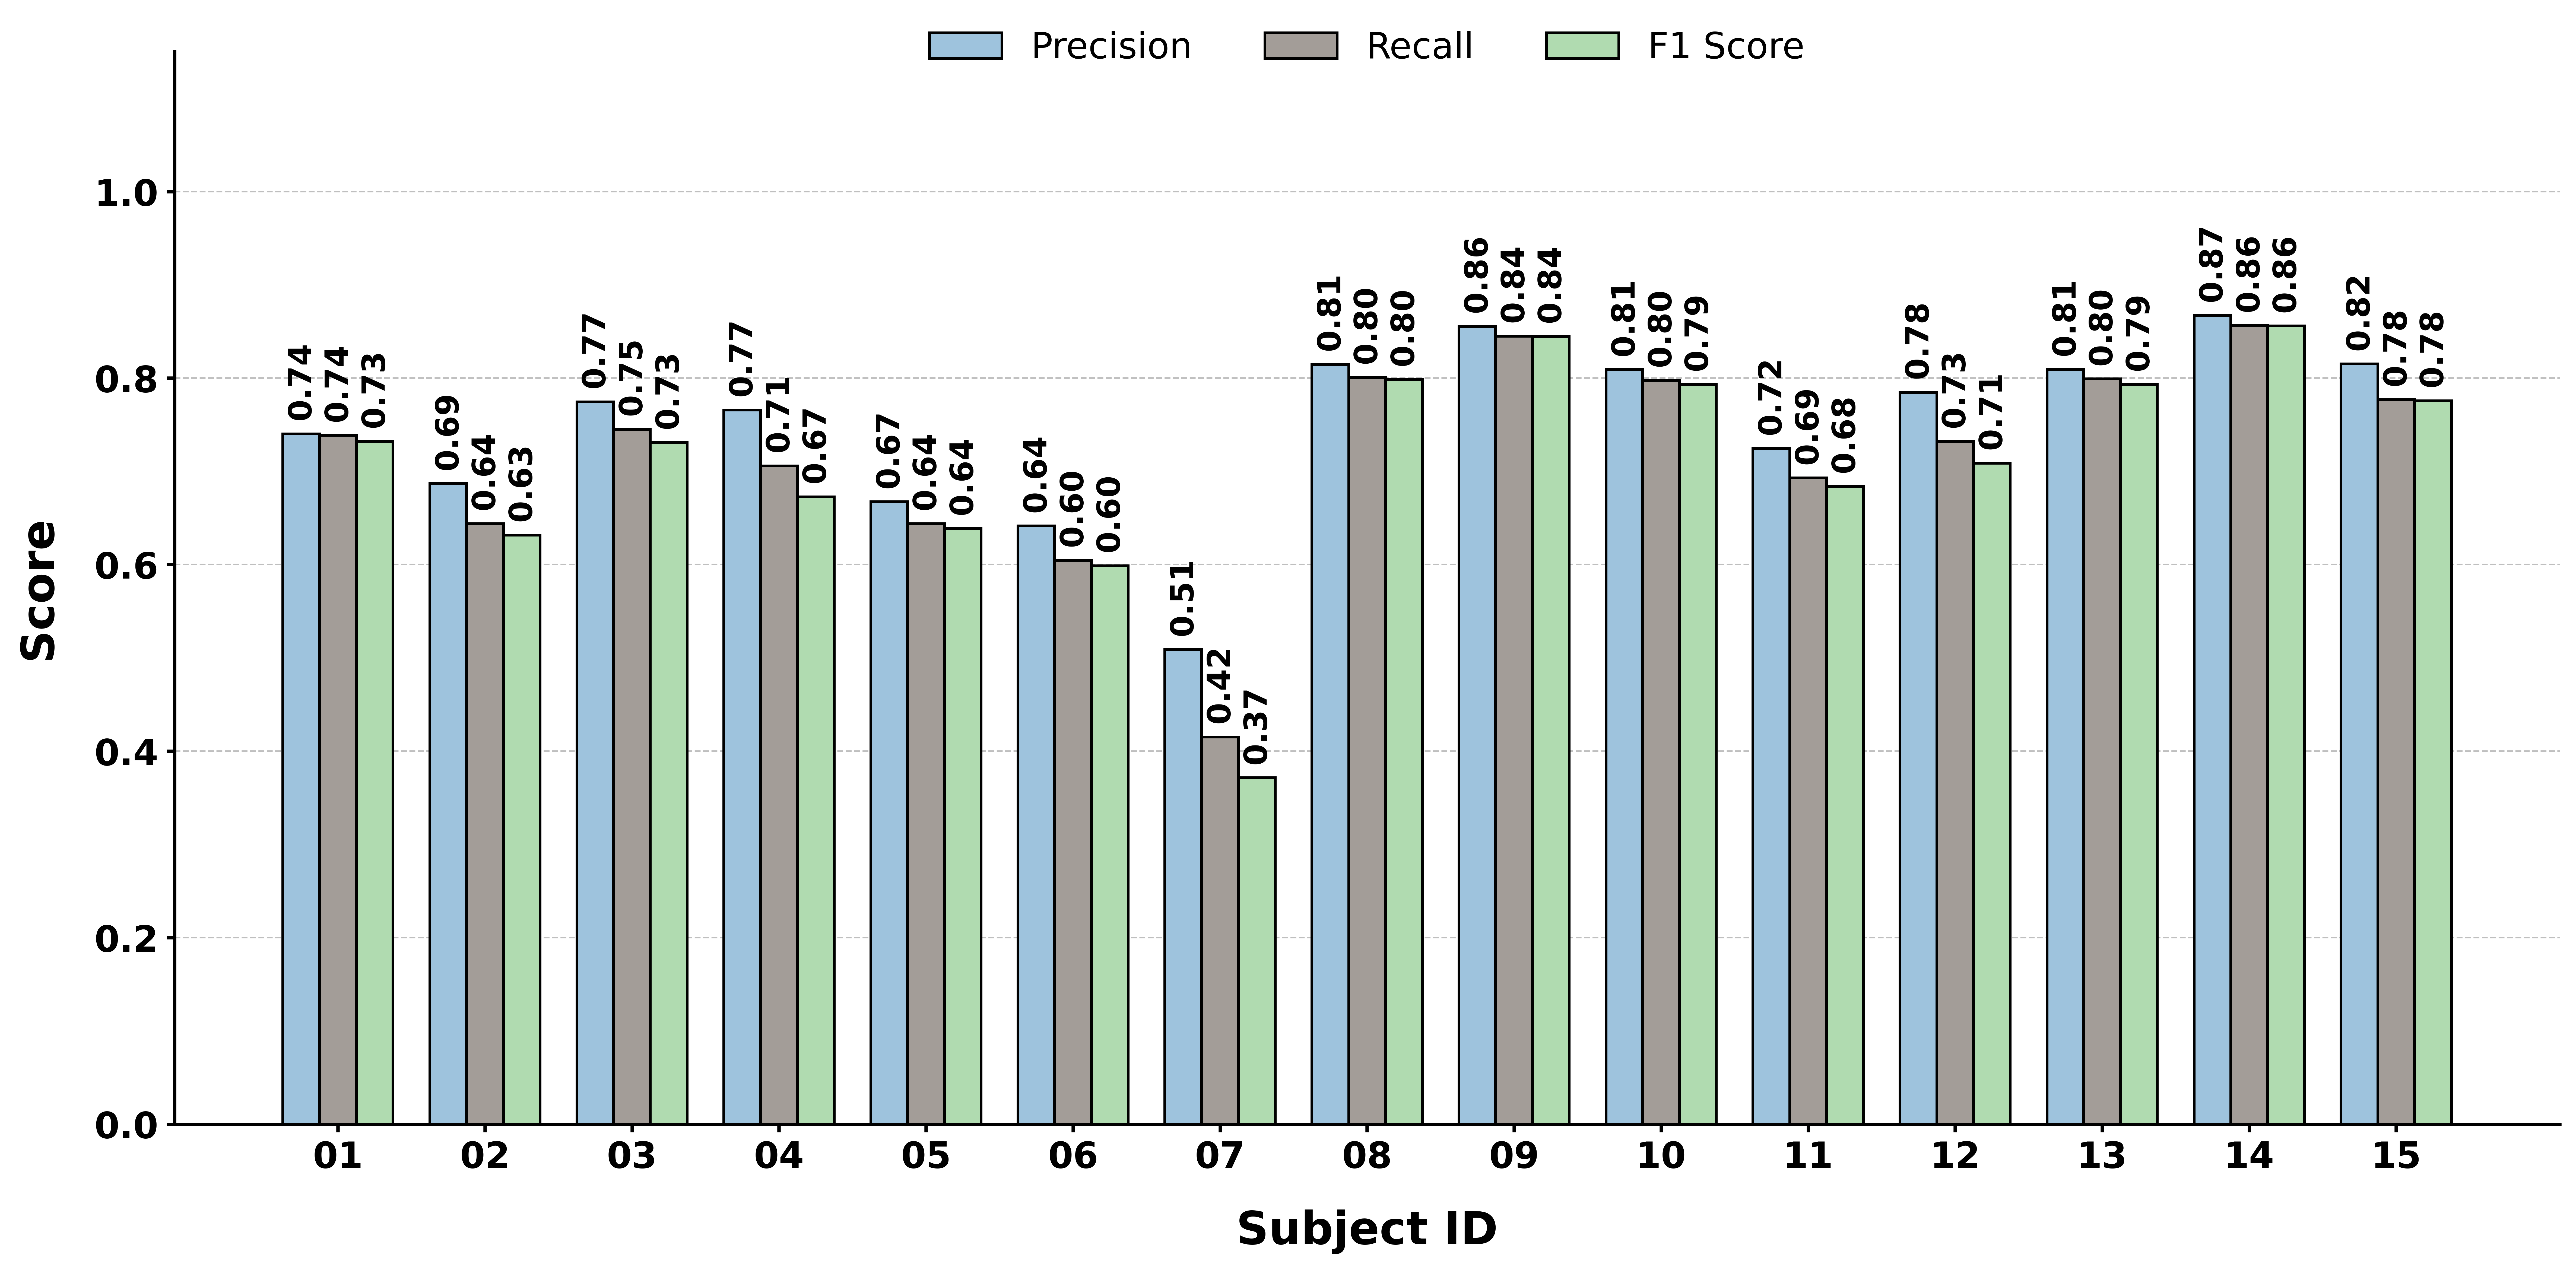

[2025-11-26 16:44:39] [INFO] Metrics plot saved to results/images/overt_covert_rest_metrics.pdf
[2025-11-26 16:44:39] [INFO] Metrics summary per subject:
   subject_id  precision    recall        f1
0          01   0.740118  0.738562  0.731894
1          02   0.686747  0.643791  0.631565
2          03   0.774526  0.745098  0.730855
3          04   0.765776  0.705882  0.672643
4          05   0.667229  0.643791  0.638658
5          06   0.641337  0.604575  0.598678
6          07   0.508984  0.415033  0.371319
7          08   0.814583  0.800654  0.798260
8          09   0.855446  0.844771  0.844620
9          10   0.808963  0.797386  0.793083
10         11   0.724514  0.692810  0.683802
11         12   0.784627  0.732026  0.708780
12         13   0.809236  0.799020  0.792986
13         14   0.866969  0.856209  0.855794
14         15   0.815055  0.776682  0.775519


In [8]:
plot_metrics(logger)